In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv('epilepsy_prediction_dataset.xls')

In [4]:
data = data.drop(columns=['seizure_history'])

In [5]:
data.head()

,age,sex,heart_rate,systolic_bp,diastolic_bp,blood_oxygen_level,epileptic_seizure
0,52,0,69.019028,162.589359,96.985086,98.861587,1
1,15,1,101.706999,90.362215,82.749874,88.030146,1
2,72,0,133.770887,107.764710,90.061888,97.691547,1
3,61,0,160.502318,134.656734,91.690729,89.650276,1
4,21,0,82.027589,153.477815,106.262766,96.015991,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 10000 non-null  int64  
 1   sex                 10000 non-null  int64  
 2   heart_rate          10000 non-null  float64
 3   systolic_bp         10000 non-null  float64
 4   diastolic_bp        10000 non-null  float64
 5   blood_oxygen_level  10000 non-null  float64
 6   epileptic_seizure   10000 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 547.0 KB


In [7]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 7


In [8]:
data.isnull().sum()

age                   0
sex                   0
heart_rate            0
systolic_bp           0
diastolic_bp          0
blood_oxygen_level    0
epileptic_seizure     0
dtype: int64

In [9]:
data.columns

Index(['age', 'sex', 'heart_rate', 'systolic_bp', 'diastolic_bp',
       'blood_oxygen_level', 'epileptic_seizure'],
      dtype='object')

In [10]:
readings = data.drop('epileptic_seizure',axis=1)

In [11]:
hasoccured = data['epileptic_seizure']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(readings,hasoccured,test_size=0.20,random_state=42)

In [14]:
y_train

9254    1
1561    1
1670    1
6087    0
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: epileptic_seizure, Length: 8000, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [17]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [18]:
X_train

array([[-0.26691625,  1.01181985, -1.21329759,  0.23456532,  1.24971403,
         1.11467384],
       [ 1.67478712, -0.98831823,  0.20928   ,  0.27035135, -0.72610831,
         0.41598805],
       [ 0.43209696,  1.01181985,  1.67516503,  0.71718036,  0.55390483,
        -1.28015623],
       ...,
       [-0.53875473, -0.98831823,  0.71784368,  0.58478628, -1.49951845,
        -0.04209842],
       [-0.03391185, -0.98831823, -0.82862532,  0.71483923, -0.3963468 ,
         0.71829344],
       [ 0.93693984, -0.98831823,  1.49171809, -1.49868925,  1.13139228,
         1.13298563]])

In [19]:
data.head()

,age,sex,heart_rate,systolic_bp,diastolic_bp,blood_oxygen_level,epileptic_seizure
0,52,0,69.019028,162.589359,96.985086,98.861587,1
1,15,1,101.706999,90.362215,82.749874,88.030146,1
2,72,0,133.770887,107.764710,90.061888,97.691547,1
3,61,0,160.502318,134.656734,91.690729,89.650276,1
4,21,0,82.027589,153.477815,106.262766,96.015991,0


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
lr =LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [22]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

In [23]:
from sklearn import metrics

In [24]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [25]:
print(score1,score2,score3,score4)

0.01285655702863131 -0.1810687580087904 -0.005655579045287684 0.03959900197677679


In [26]:
final_data = pd.DataFrame({'RegressionModels': ['Linear', 'SupportVector', 'DecisionTree', 'RandomForest'], 'R2_SCORE': [score1,score2,score3,score4]})

In [27]:
final_data

,RegressionModels,R2_SCORE
0,Linear,0.012857
1,SupportVector,-0.181069
2,DecisionTree,-0.005656
3,RandomForest,0.039599


In [28]:
import seaborn as sns

<AxesSubplot: xlabel='RegressionModels', ylabel='R2_SCORE'>

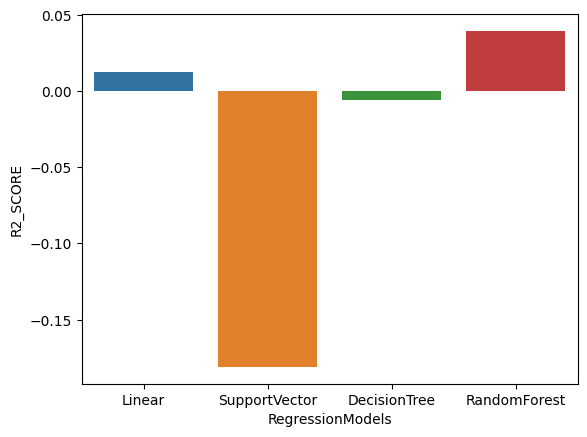

In [29]:
sns.barplot(x='RegressionModels',y='R2_SCORE',data=final_data)

In [30]:
import numpy as np

In [31]:
y_train = [1 if value>0.85 else 0 for value in y_train]
y_test = [1 if value>0.85 else 0 for value in y_test]

y_train = np.array(y_train)
y_test = np.array(y_test)

In [32]:
y_train

array([1, 1, 1, ..., 1, 1, 0])

In [33]:
print(len(y_train))

8000


In [34]:
print(np.count_nonzero(y_train))

3837


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [36]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred1= lr.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.5325


In [37]:
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.5475


In [38]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred3))

0.5335


In [39]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred4 = rf.predict(X_test)
print(accuracy_score(y_test,y_pred4))

0.5195


In [40]:
gr = GradientBoostingClassifier()
gr.fit(X_train,y_train)
y_pred5 = gr.predict(X_test)
print(accuracy_score(y_test,y_pred5))

0.52


In [41]:
final_data = pd.DataFrame({'ClassifierModels':['LogisticRegression','SupportVector','KNeighbors','RandomForest','GradientBoosting'],
                           'ACC_SCORE':[accuracy_score(y_test,y_pred1),
                                       accuracy_score(y_test,y_pred2),
                                       accuracy_score(y_test,y_pred3),
                                       accuracy_score(y_test,y_pred4),
                                       accuracy_score(y_test,y_pred5)]})

In [42]:
final_data

,ClassifierModels,ACC_SCORE
0,LogisticRegression,0.5325
1,SupportVector,0.5475
2,KNeighbors,0.5335
3,RandomForest,0.5195
4,GradientBoosting,0.5200


In [43]:
import seaborn as sns

<AxesSubplot: xlabel='ClassifierModels', ylabel='ACC_SCORE'>

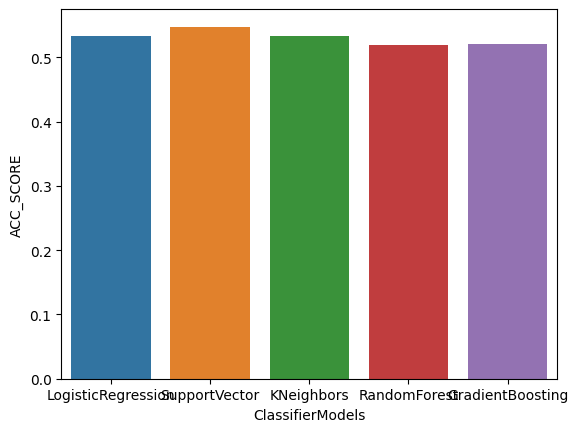

In [44]:
sns.barplot(x=final_data['ClassifierModels'],y=final_data['ACC_SCORE'])

In [55]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Initialize the individual models, including the optimized RandomForest
lr = LogisticRegression()
svc = svm.SVC()
knn = KNeighborsClassifier()
rf_optimal = RandomForestClassifier(n_estimators=100, max_depth=30)
gr = GradientBoostingClassifier()

# Create the VotingClassifier ensemble
ensemble = VotingClassifier(estimators=[
    ('lr', lr), 
    ('svc', svc), 
    ('knn', knn), 
    ('rf', rf_optimal),  # Use optimized RandomForest
    ('gr', gr)], voting='hard')

# Fit and evaluate the ensemble
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

scores = cross_val_score(ensemble, X_train, y_train, cv=5, scoring='accuracy')

# Evaluate ensemble performance
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Accuracy: {accuracy_ensemble}\n\n\n')



Ensemble Accuracy: 0.5285





In [59]:
print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')


Cross-validation scores: [0.564375 0.544375 0.520625 0.53     0.558125]
Average cross-validation score: 0.5435


In [62]:
from sklearn.metrics import classification_report, accuracy_score

# After fitting the ensemble model and making predictions
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

# Print the classification report
print("Classification Report for Ensemble Model:\n")
print(classification_report(y_test, y_pred_ensemble))

# Also print the accuracy for completeness
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Accuracy: {accuracy_ensemble}\n")


Classification Report for Ensemble Model:

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1049
           1       0.50      0.50      0.50       951

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.53      0.53      0.53      2000

Ensemble Accuracy: 0.529



In [47]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for RandomForest
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [10, 20, 30]
}

# Perform GridSearch with Cross-Validation
grid_search = GridSearchCV(ensemble, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)


Best parameters: {'rf__max_depth': 30, 'rf__n_estimators': 100}
Best cross-validated accuracy: 0.548625


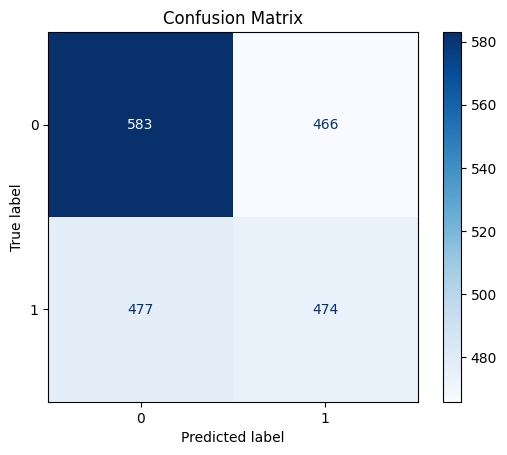

Confusion Matrix:
[[583 466]
 [477 474]]


In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions using your ensemble model
y_pred_ensemble = ensemble.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Optional: Print the confusion matrix
print("Confusion Matrix:")
print(cm)


In [61]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')


Accuracy: 0.5285
Precision: 0.5042553191489362
Recall: 0.49842271293375395
F1 Score: 0.5013220518244315


In [63]:
from sklearn.preprocessing import StandardScaler
import joblib

# Initialize the scaler
sc = StandardScaler()

# Fit and transform the training data
X_train = sc.fit_transform(X_train)

# Transform the test data
X_test = sc.transform(X_test)

# Save the scaler to a file
joblib.dump(sc, 'scaler.joblib')



['scaler.joblib']

In [64]:
import joblib

# Save the trained ensemble model
joblib.dump(ensemble, 'voting_classifier_ensemble.joblib')

['voting_classifier_ensemble.joblib']

In [65]:
# Load the saved ensemble model
ensemble_loaded = joblib.load('voting_classifier_ensemble.joblib')

# Make predictions with the loaded ensemble
y_pred_loaded = ensemble_loaded.predict(X_test)

# Check if the accuracy is consistent
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f'Loaded Ensemble Accuracy: {accuracy_loaded}')


Loaded Ensemble Accuracy: 0.529


In [74]:
import gradio as gr
import numpy as np
import joblib

# Load your trained model
model = joblib.load('voting_classifier_ensemble.joblib')



def predict_epilepsy(age, sex, heart_rate, systolic_bp, diastolic_bp, blood_oxygen_level):
    # Convert sex and seizure history to numerical values
    sex_numeric = 1 if sex == "Male" else 0
    
    
    # Prepare input data
    input_data = np.array([[age, sex_numeric, heart_rate, systolic_bp, diastolic_bp, blood_oxygen_level]])
    prediction = model.predict(input_data)
    
    # Convert prediction to human-readable format
    return "Seizure Predicted" if prediction[0] == 1 else "No Seizure Predicted"

# Create Gradio interface
iface = gr.Interface(
    fn=predict_epilepsy,
    inputs=[
        gr.Number(label="Age"),
        gr.Radio(label="Sex", choices=["Male", "Female"]),
        gr.Number(label="Heart Rate"),
        gr.Number(label="Systolic BP"),
        gr.Number(label="Diastolic BP"),
        gr.Number(label="Blood Oxygen Level"),
       
    ],
    outputs="text",
    title="Epilepsy Prediction Model",
    description="Input the patient's details to predict seizure occurrence."
)

# Launch the app
iface.launch(share=True)
#21	0	82.027589	153.477815	106.262766	96.015991	0



Running on local URL:  http://127.0.0.1:7865

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


In [81]:
# Fit the ensemble on training data
ensemble.fit(X_train, y_train)

# Prepare the input data
input_data = np.array([21, 0, 82.027589, 153.477815, 106.262766, 96.01599]).reshape(1, -1)  # Reshape for a single sample

# Scale the input data
input_data_scaled = sc.transform(input_data)

# Make a prediction
prediction = ensemble.predict(input_data_scaled)

# Output the prediction
print(f"Prediction (0 = no seizure, 1 = seizure): {prediction[0]}")


Prediction (0 = no seizure, 1 = seizure): 1


In [82]:
import numpy as np

# Assuming 'ensemble' is already fitted and 'sc' is the StandardScaler instance
# Generate or define 50 test inputs
# For this example, let's create random inputs. Adjust these values as needed for your use case.

# Example: Generating 50 random inputs, with 6 features each (adjust according to your actual feature set)
# You should replace this with your actual input data if you have specific values to test
num_samples = 50
# Example: Random values for the features (replace this with your own test data)
input_data = np.random.rand(num_samples, 6) * 100  # Random values scaled between 0 and 100

# Scale the input data
input_data_scaled = sc.transform(input_data)

# Make predictions for the batch of inputs
predictions = ensemble.predict(input_data_scaled)

# Output the predictions
for i, prediction in enumerate(predictions):
    print(f"Input {i+1}: Prediction (0 = no seizure, 1 = seizure): {prediction}")


Input 1: Prediction (0 = no seizure, 1 = seizure): 0
Input 2: Prediction (0 = no seizure, 1 = seizure): 1
Input 3: Prediction (0 = no seizure, 1 = seizure): 1
Input 4: Prediction (0 = no seizure, 1 = seizure): 1
Input 5: Prediction (0 = no seizure, 1 = seizure): 0
Input 6: Prediction (0 = no seizure, 1 = seizure): 0
Input 7: Prediction (0 = no seizure, 1 = seizure): 0
Input 8: Prediction (0 = no seizure, 1 = seizure): 0
Input 9: Prediction (0 = no seizure, 1 = seizure): 0
Input 10: Prediction (0 = no seizure, 1 = seizure): 1
Input 11: Prediction (0 = no seizure, 1 = seizure): 0
Input 12: Prediction (0 = no seizure, 1 = seizure): 0
Input 13: Prediction (0 = no seizure, 1 = seizure): 1
Input 14: Prediction (0 = no seizure, 1 = seizure): 1
Input 15: Prediction (0 = no seizure, 1 = seizure): 0
Input 16: Prediction (0 = no seizure, 1 = seizure): 1
Input 17: Prediction (0 = no seizure, 1 = seizure): 0
Input 18: Prediction (0 = no seizure, 1 = seizure): 1
Input 19: Prediction (0 = no seizure,